In [1]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from collections import defaultdict
from pathlib import Path

import sys
sys.path.append("ComputeCanada/frequency_tagging")
from dfm import (
    f1_f2_data, 
    analyze_rois,
    extract_im_products,
    get_roi_colour_codes,
    change_font,
)
change_font()

/opt/app/notebooks/font_library/aptos-bold.ttf
/opt/app/notebooks/font_library/aptos-extrabold.ttf
/opt/app/notebooks/font_library/aptos-extrabold-italic.ttf
/opt/app/notebooks/font_library/aptos-light.ttf
/opt/app/notebooks/font_library/aptos-semibold.ttf
/opt/app/notebooks/font_library/aptos-light-italic.ttf
/opt/app/notebooks/font_library/aptos-black.ttf
/opt/app/notebooks/font_library/aptos-italic.ttf
/opt/app/notebooks/font_library/aptos-extrabold-italic 2.ttf
/opt/app/notebooks/font_library/aptos.ttf
/opt/app/notebooks/font_library/aptos-black-italic.ttf


cohort looping info

In [2]:
mri_ids = [
    ["3T"],
    ["7T"],
    ["3T"],["3T"],["3T"],["3T"],["3T"],["3T"],
    ["7T"],["7T"],["7T"],["7T"],["7T"],["7T"],
]
sub_ids = [
    ["000","002","003","004","005","006","007","008","009"],
    ["Pilot001","Pilot009","Pilot010","Pilot011"],
    ["020"],["020"],["020"],["021"],["021"],["021"],
    ["020"],["020"],["020"],["021"],["021"],["021"],
]
task_ids = [
    ["entrain", "control"],
    ["AttendAway"],
    ["entrainA"],["entrainB"],["entrainC"],["entrainD"],["entrainE"],["entrainF"],
    ["entrainA"],["entrainB"],["entrainC"],["entrainD"],["entrainE"],["entrainF"],
]
info_dict = {
    ("3T","entrain"): ("1_frequency_tagging","entrain",[.125,.2]),
    ("3T","control"): ("1_frequency_tagging","entrain",[.125,.2]),
    ("7T","AttendAway"): ("1_attention","AttendAway",[.125,.2]),
    ("3T","entrainA"): ("1_frequency_tagging","entrainA",[.125,.2]),
    ("3T","entrainB"): ("1_frequency_tagging","entrainB",[.125,.175]),
    ("3T","entrainC"): ("1_frequency_tagging","entrainC",[.125,.15]),
    ("3T","entrainD"): ("1_frequency_tagging","entrainD",[.125,.2]),
    ("3T","entrainE"): ("1_frequency_tagging","entrainE",[.15,.2]),
    ("3T","entrainF"): ("1_frequency_tagging","entrainF",[.175,.2]),
    ("7T","entrainA"): ("1_frequency_tagging","entrainA",[.125,.2]),
    ("7T","entrainB"): ("1_frequency_tagging","entrainB",[.125,.175]),
    ("7T","entrainC"): ("1_frequency_tagging","entrainC",[.125,.15]),
    ("7T","entrainD"): ("1_frequency_tagging","entrainD",[.125,.2]),
    ("7T","entrainE"): ("1_frequency_tagging","entrainE",[.15,.2]),
    ("7T","entrainF"): ("1_frequency_tagging","entrainF",[.175,.2]),
}

1_frequency_tagging 3T 000 entrain entrain [0.125, 0.2]


4.3859968947626305e-05
3.300333235003891e-05
1.449259775562081e-05
1_frequency_tagging 3T 000 entrain control [0.125, 0.2]
1.1270109659609568e-05
7.29083997344429e-06
8.511772284911289e-06
1_frequency_tagging 3T 002 entrain entrain [0.125, 0.2]
6.280999737374098e-05
3.83725969247289e-05
2.234628935836365e-05
1_frequency_tagging 3T 002 entrain control [0.125, 0.2]
1.2381306023961977e-05
5.575320602855522e-06
8.378957571161619e-06
1_frequency_tagging 3T 003 entrain entrain [0.125, 0.2]
0.00019994758890529369
3.0336927419012926e-05
1.1812885095006596e-05
1_frequency_tagging 3T 003 entrain control [0.125, 0.2]
5.336989936168349e-06
1.977821506877757e-05
1.70151077590494e-06
1_frequency_tagging 3T 004 entrain entrain [0.125, 0.2]
0.00030371161544380016
0.00013897703494851848
0.00012674345493931245
1_frequency_tagging 3T 004 entrain control [0.125, 0.2]
7.3785499839624635e-06
2.1168887846972816e-05
6.47317471886789e-06
1_frequency_tagging 3T 005 entrain entrain [0.125, 0.2]
0.000164058799677

/tmp/ipykernel_32265/3835072749.py:58: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax_dict = plt.subplot_mosaic([["X"]], dpi=300, figsize=(2.2,1.5),layout="constrained")


0.00030760478858940597
7.347511992657614e-05
0.00016610559030276074
1_attention 7T Pilot011 AttendAway AttendAway [0.125, 0.2]
8.341067964828904e-05
8.3490375927707e-05
5.961680368108841e-06
1_frequency_tagging 3T 020 entrainA entrainA [0.125, 0.2]
8.74653446495398e-05
8.906748947396798e-05
8.186239367158194e-05
1_frequency_tagging 3T 020 entrainB entrainB [0.125, 0.175]
9.578162170156195e-05
0.00012310444068668044
1.1897679533422267e-05
1_frequency_tagging 3T 020 entrainC entrainC [0.125, 0.15]
0.00013535256875052255
8.932163547308394e-05
1.6780574922169485e-05
1_frequency_tagging 3T 021 entrainD entrainD [0.125, 0.2]
5.8613181613856525e-05
5.114985558234524e-05
0.0001151633997301468
1_frequency_tagging 3T 021 entrainE entrainE [0.15, 0.2]
0.00010119023209824684
4.9498849704547865e-05
7.243316071298078e-05
1_frequency_tagging 3T 021 entrainF entrainF [0.175, 0.2]
0.0001030783609833823
4.674337465271738e-05
5.8818770489340174e-05
1_frequency_tagging 7T 020 entrainA entrainA [0.125, 0.2

/opt/app/notebooks/ComputeCanada/frequency_tagging/dfm.py:353: RuntimeWarning: Mean of empty slice.
  return tps.mean(1), bold.mean(1)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


nan
0.00010635922248662506
0.00015444898844177058
1_frequency_tagging 3T 021 entrainF entrainF [0.175, 0.2]


/opt/app/notebooks/ComputeCanada/frequency_tagging/dfm.py:353: RuntimeWarning: Mean of empty slice.
  return tps.mean(1), bold.mean(1)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


nan
9.900689769093303e-05
0.00013839928807406895
1_frequency_tagging 7T 020 entrainA entrainA [0.125, 0.2]
0.00027292572892077956
0.0003303473018422276
0.00011015579034154054
1_frequency_tagging 7T 020 entrainB entrainB [0.125, 0.175]
0.00026421567153233255
0.0003576506773129269
0.0003016254275370282
1_frequency_tagging 7T 020 entrainC entrainC [0.125, 0.15]
0.0002789616187510486
0.0003103028168568926
0.00017721486567499214
1_frequency_tagging 7T 021 entrainD entrainD [0.125, 0.2]
0.00017764122786118655
0.00013585036662479275
6.355840179791822e-05
1_frequency_tagging 7T 021 entrainE entrainE [0.15, 0.2]
0.0001985078093907713
0.0001285034618785805
0.00022275341413332113
1_frequency_tagging 7T 021 entrainF entrainF [0.175, 0.2]


/opt/app/notebooks/ComputeCanada/frequency_tagging/dfm.py:353: RuntimeWarning: Mean of empty slice.
  return tps.mean(1), bold.mean(1)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


nan
0.00013938396746867768
0.00017063804678990005


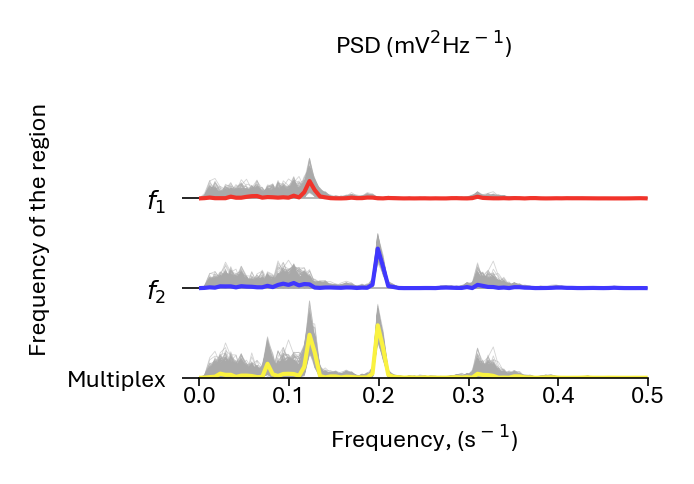

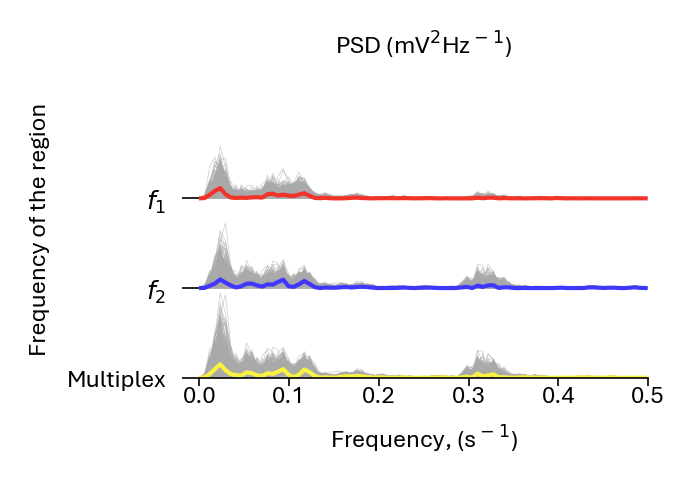

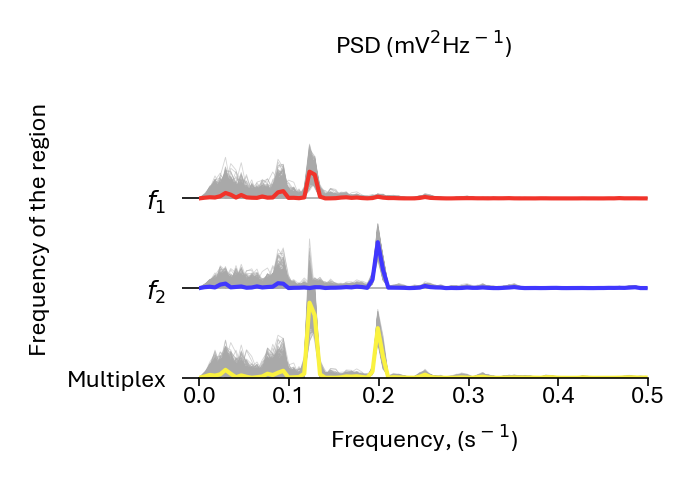

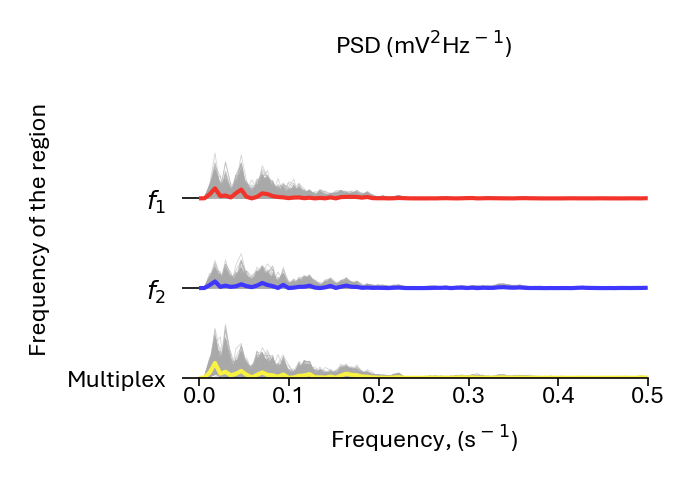

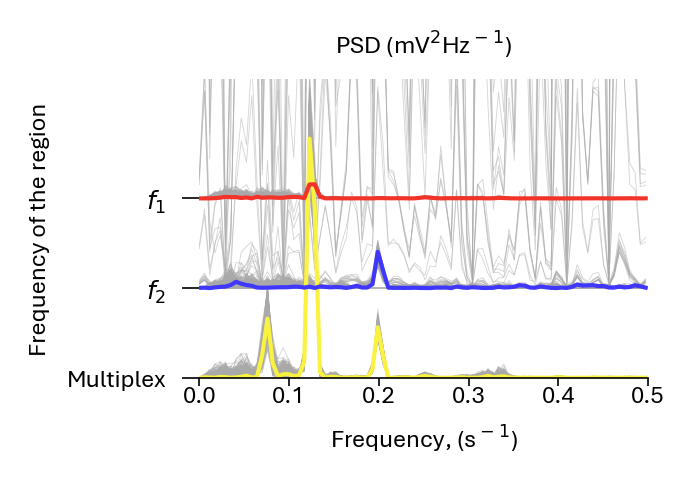

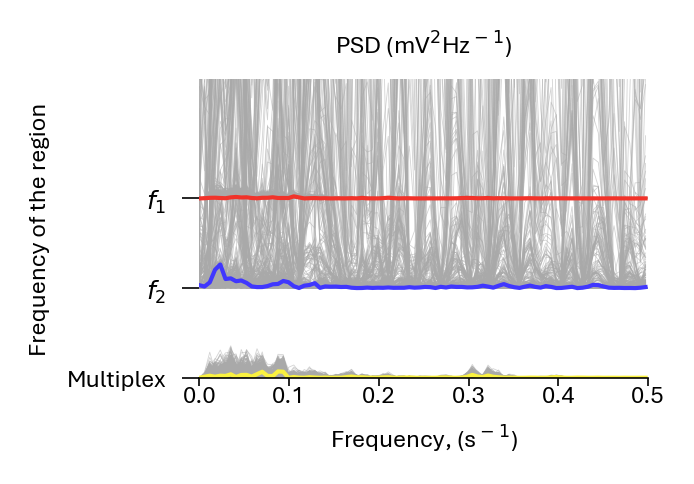

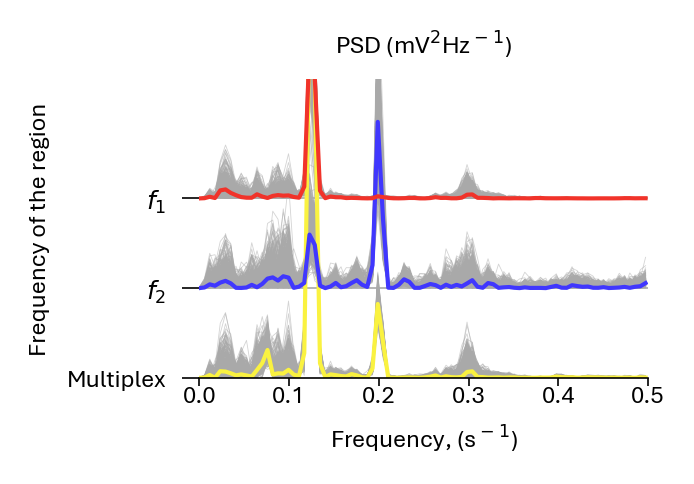

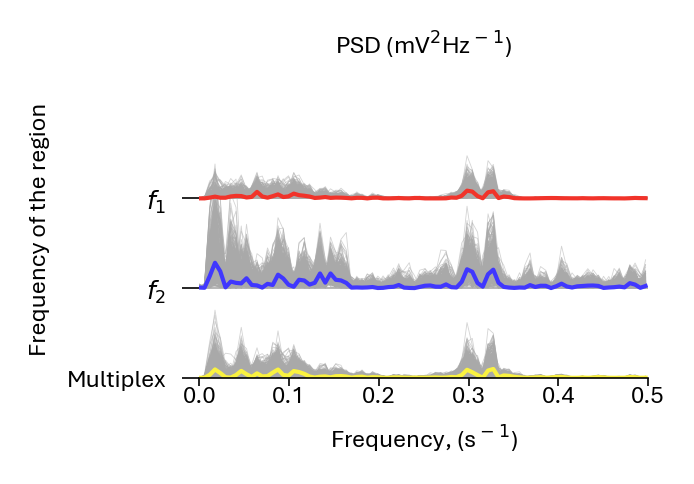

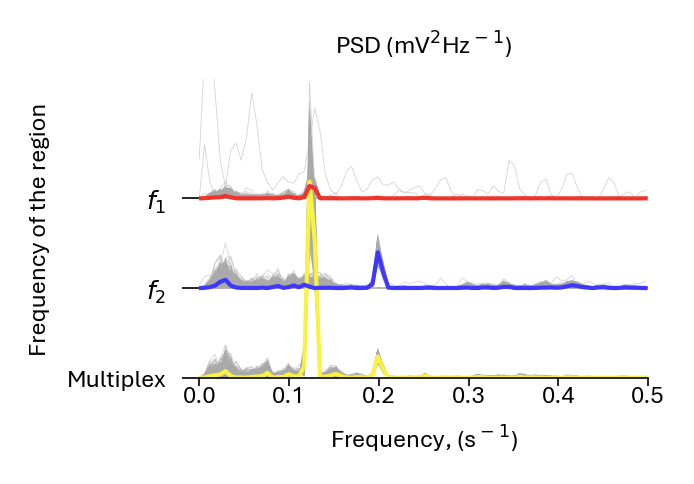

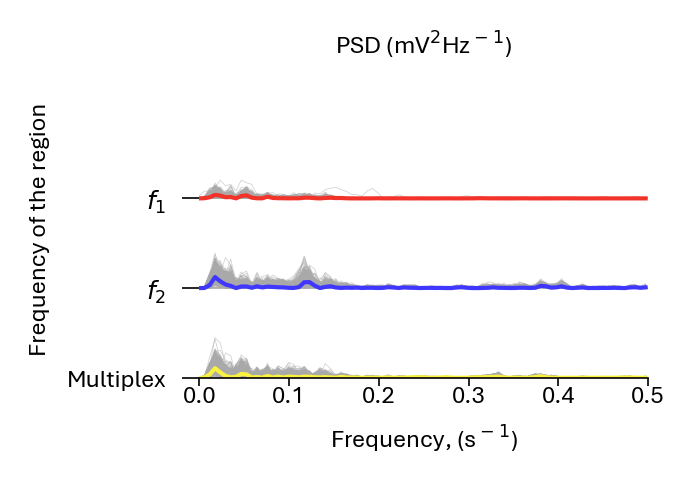

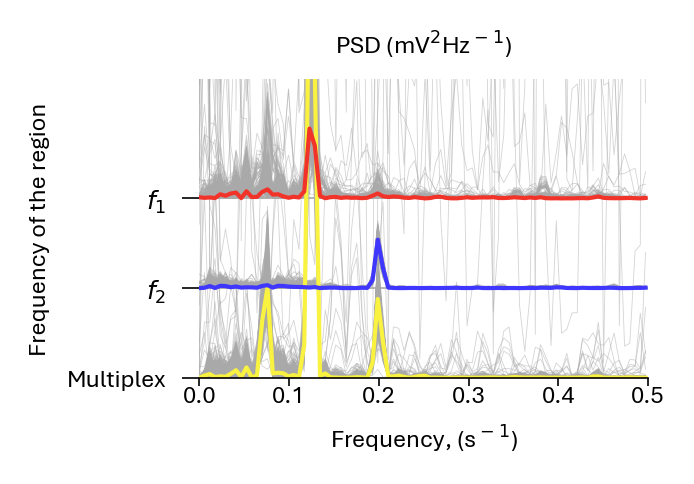

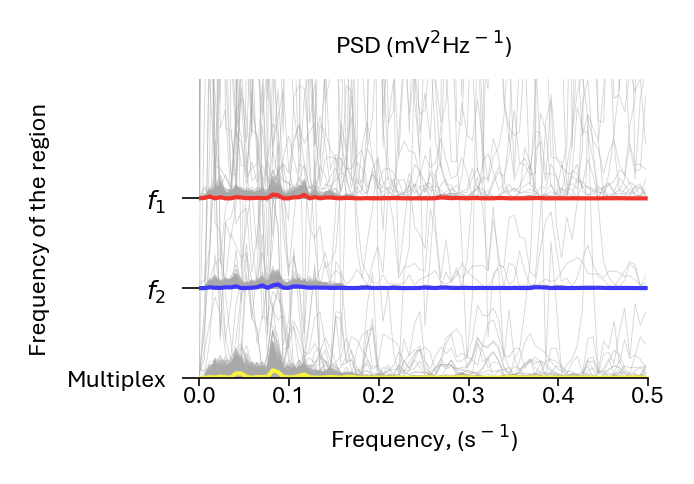

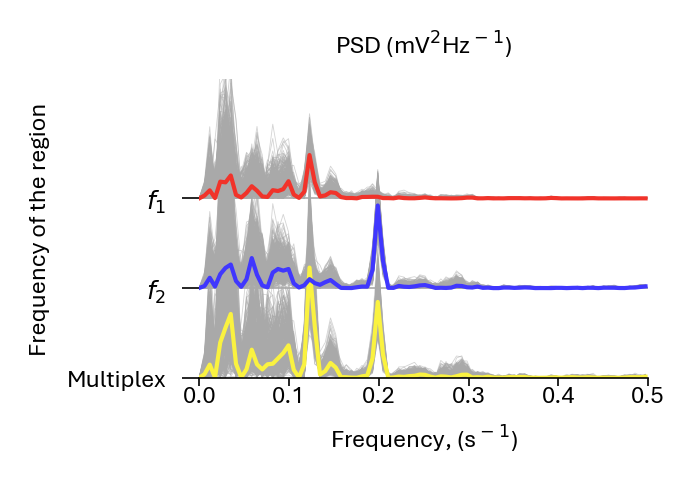

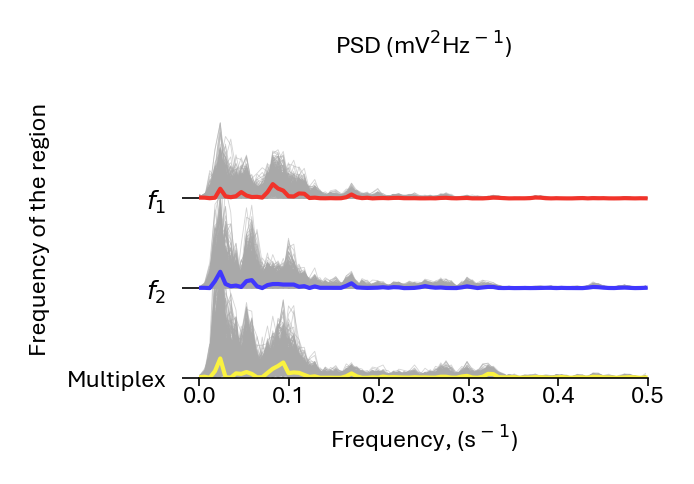

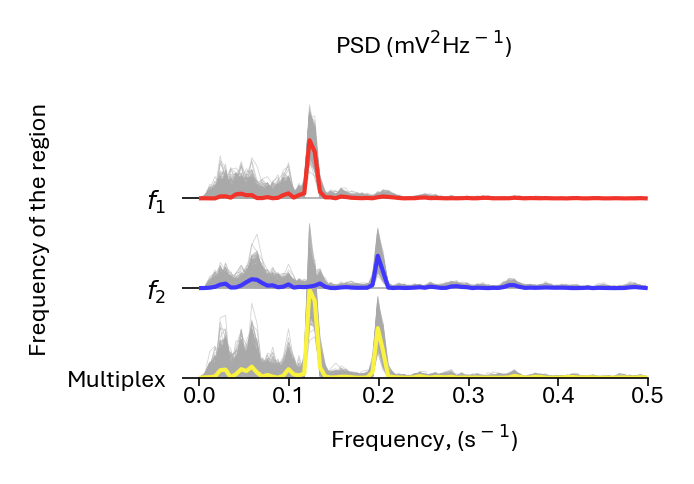

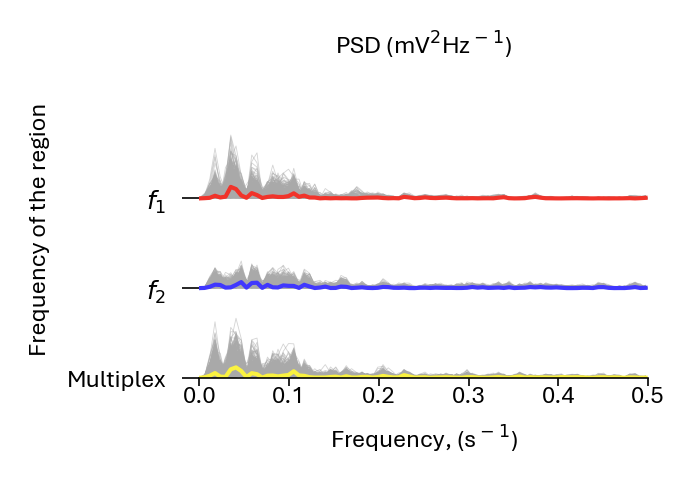

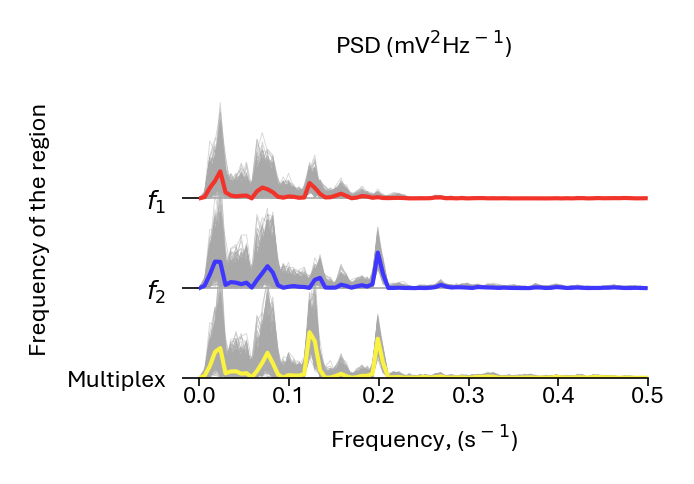

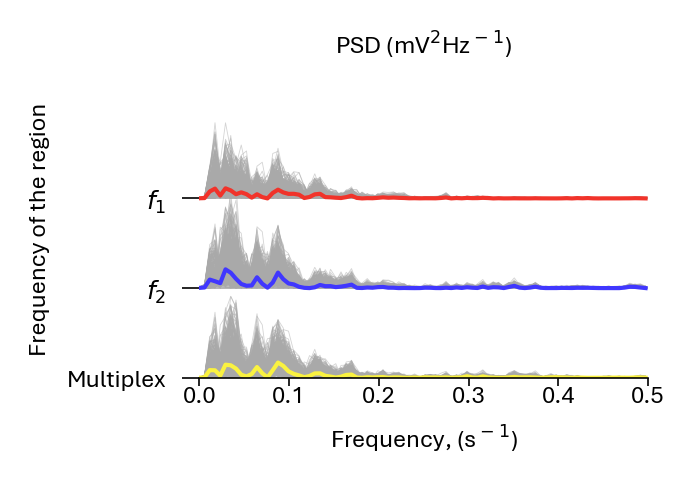

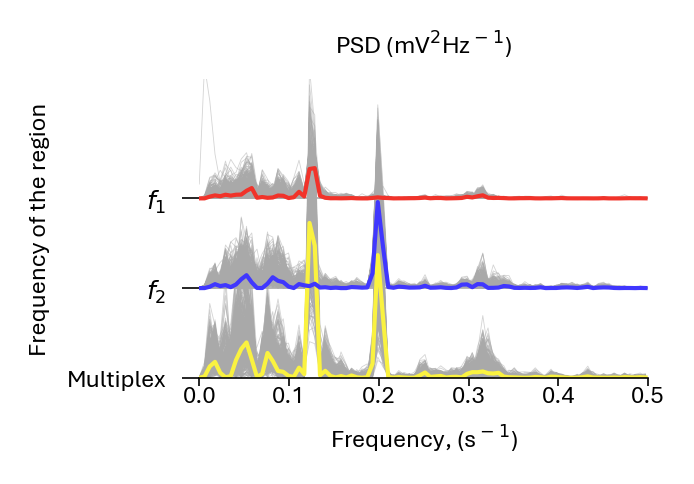

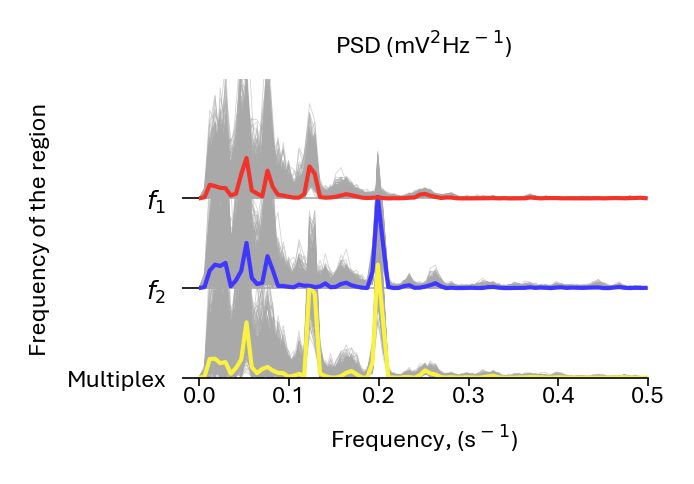

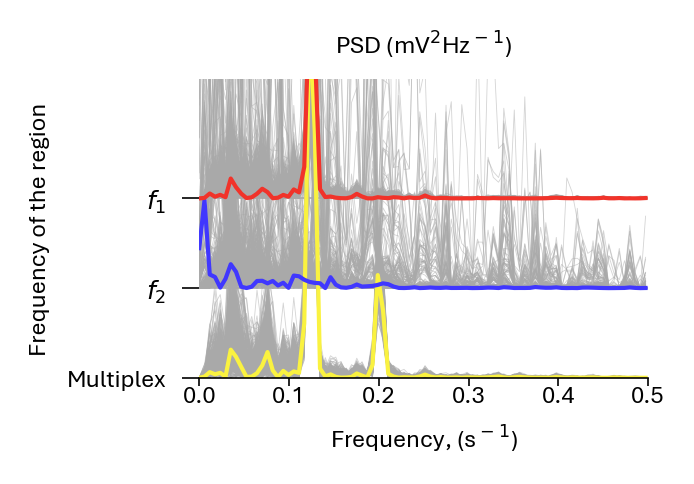

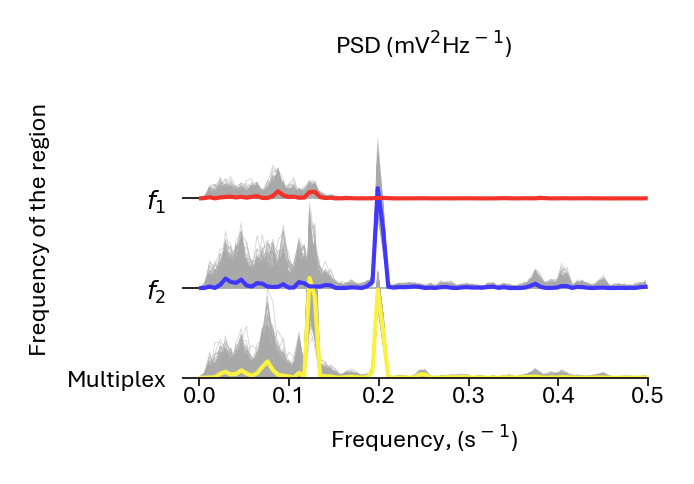

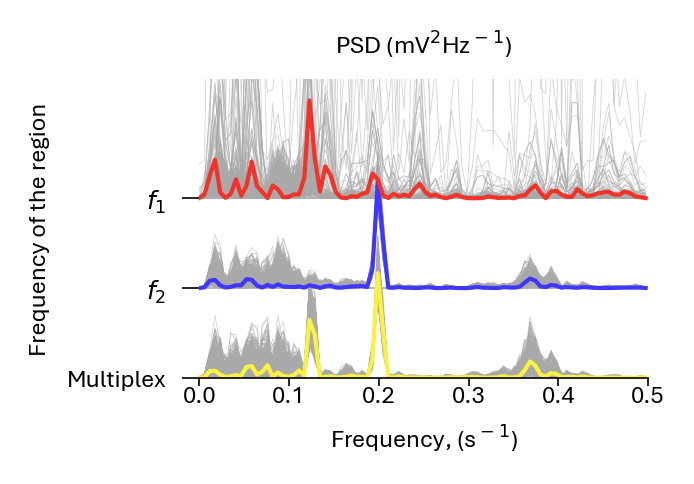

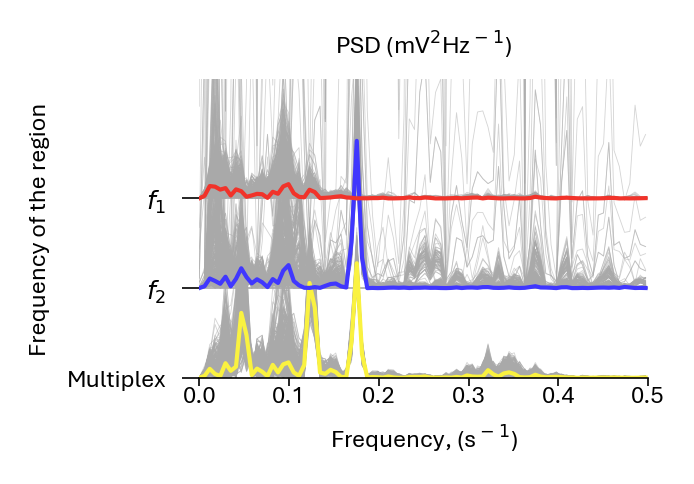

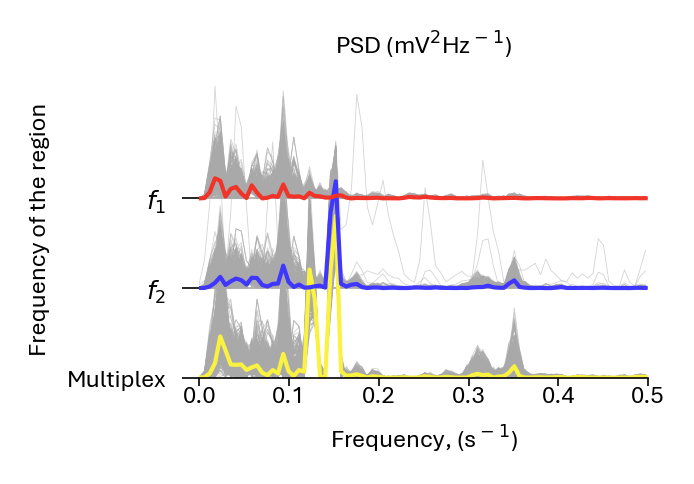

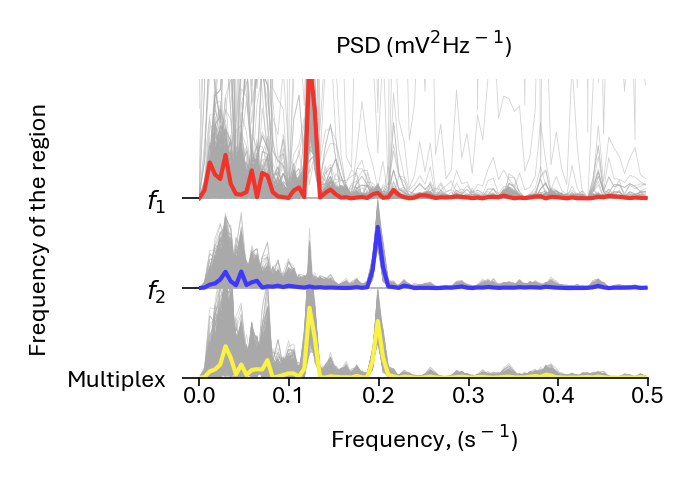

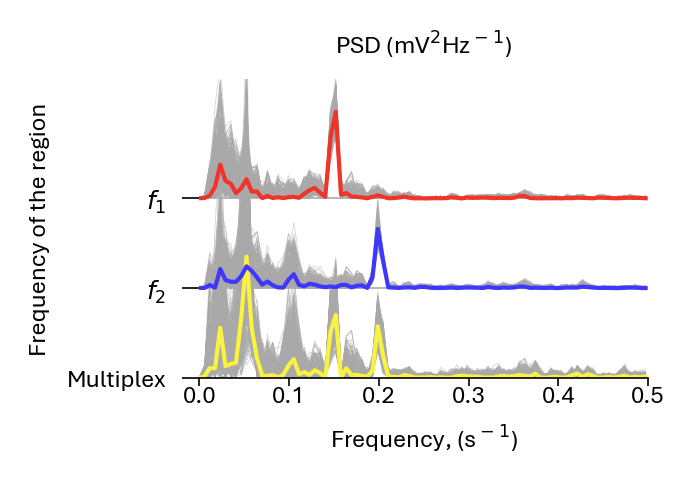

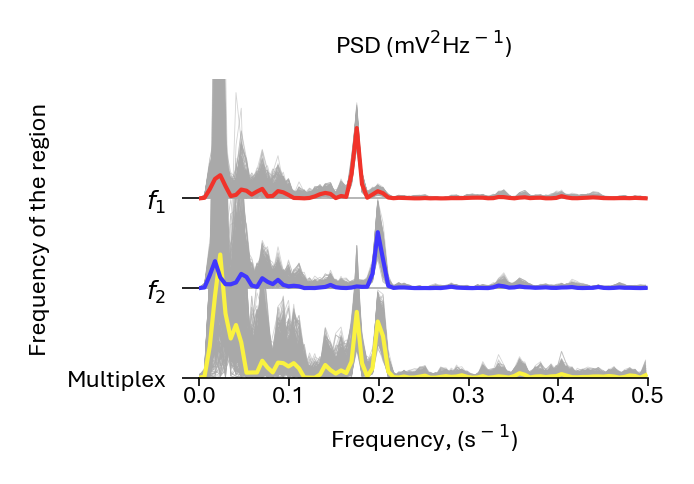

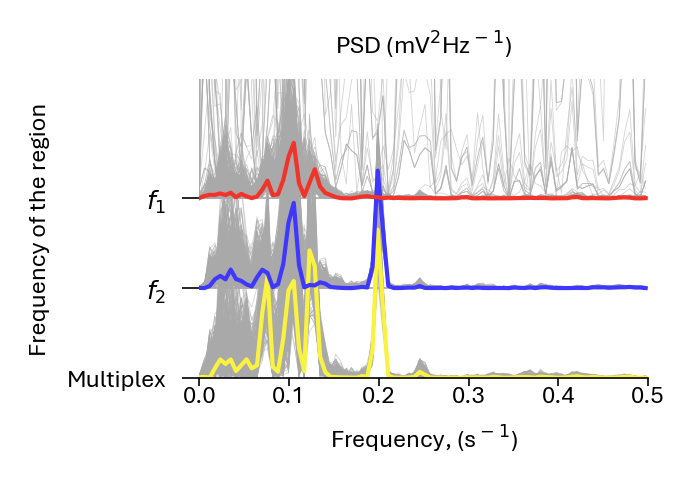

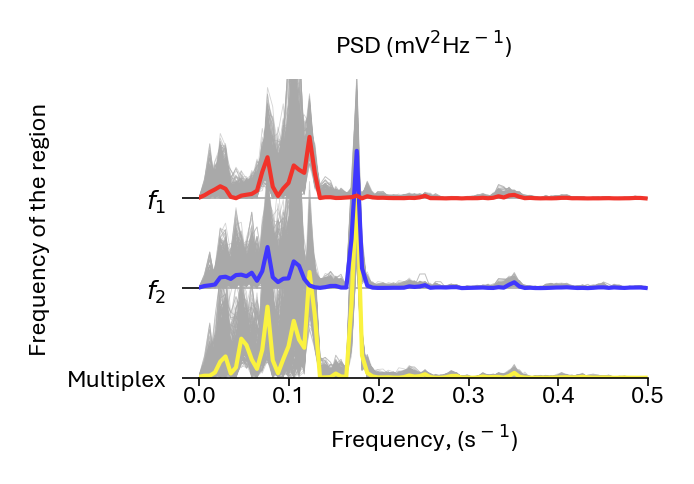

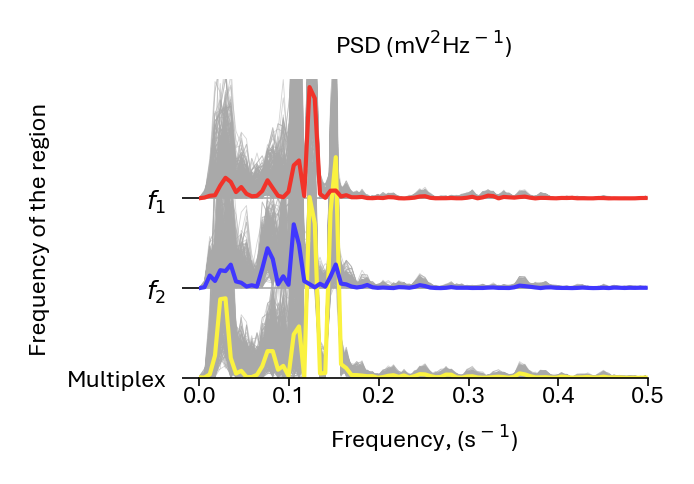

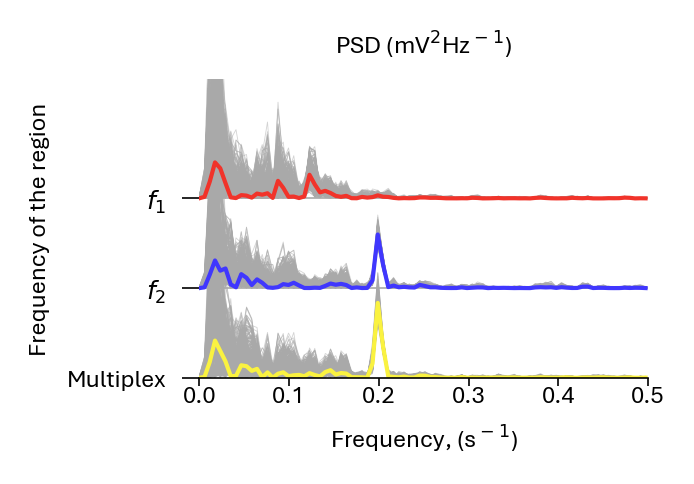

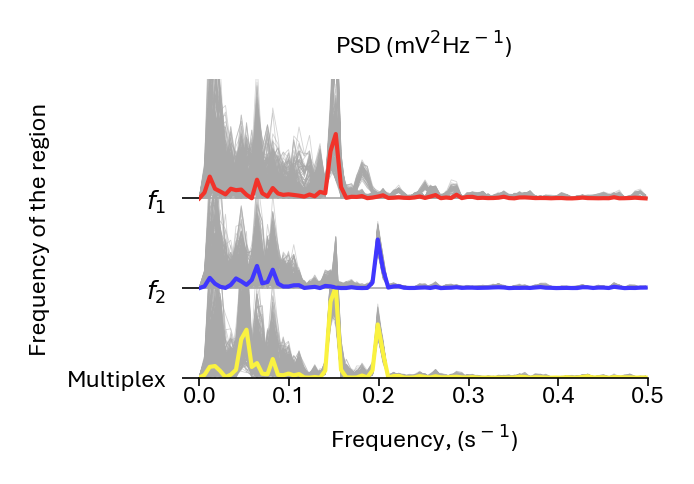

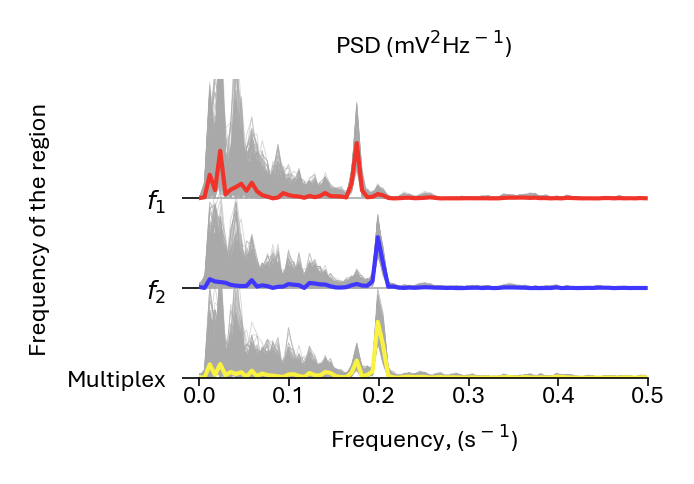

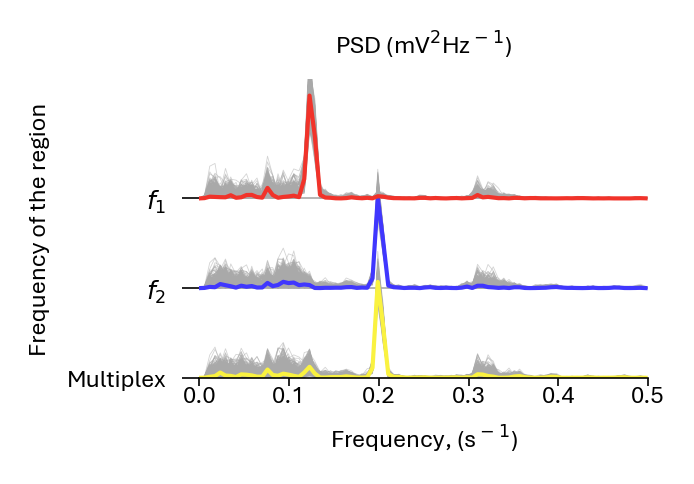

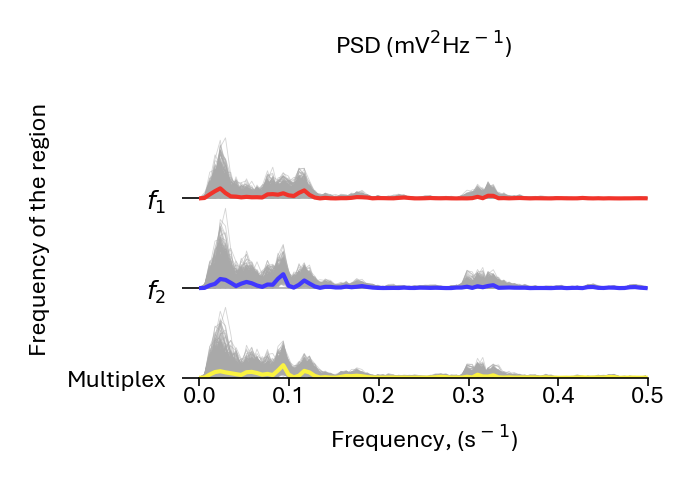

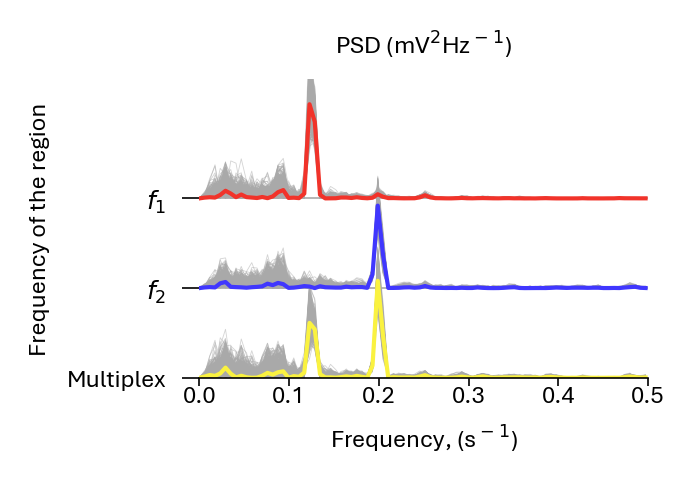

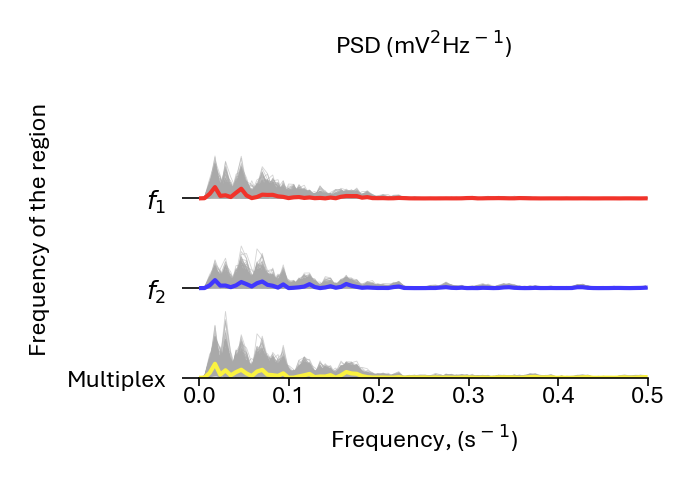

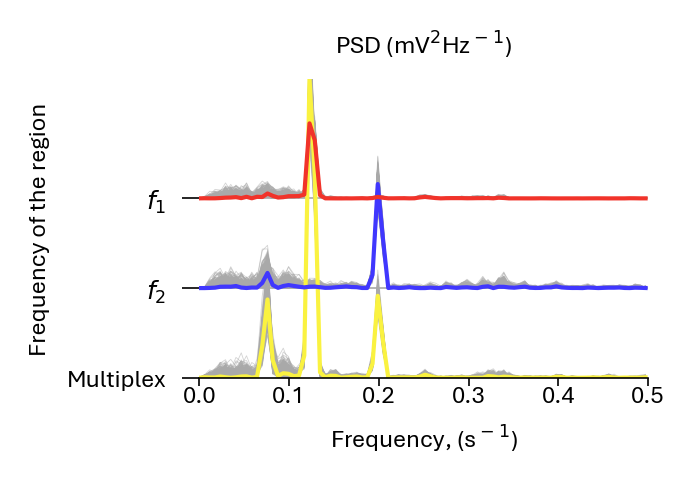

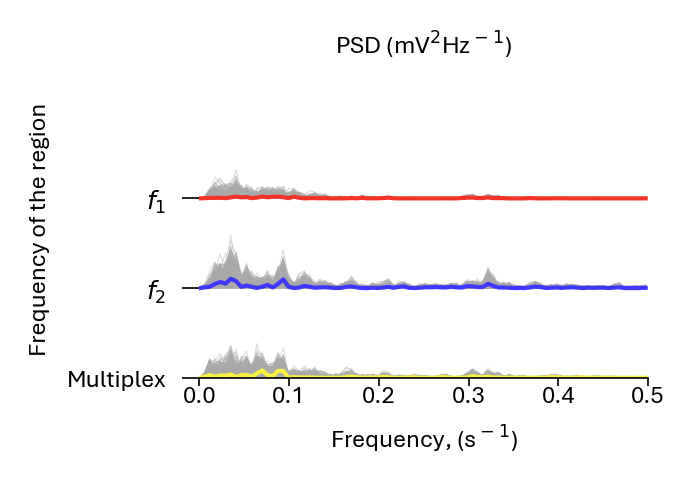

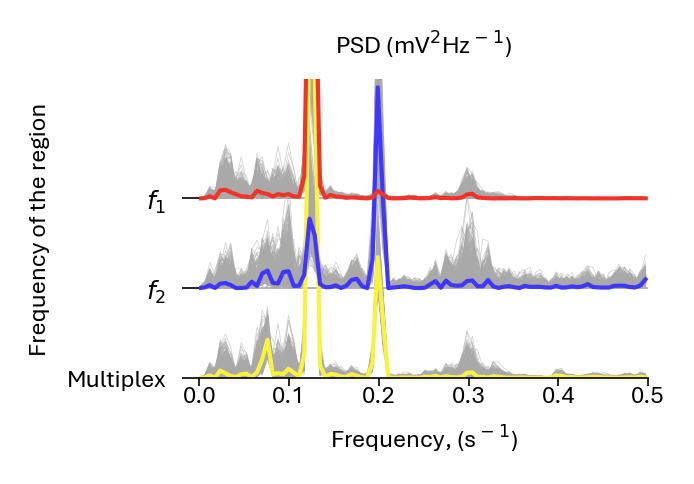

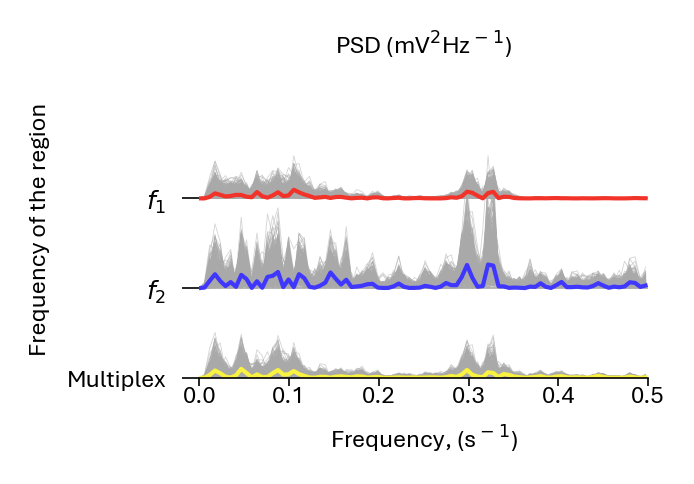

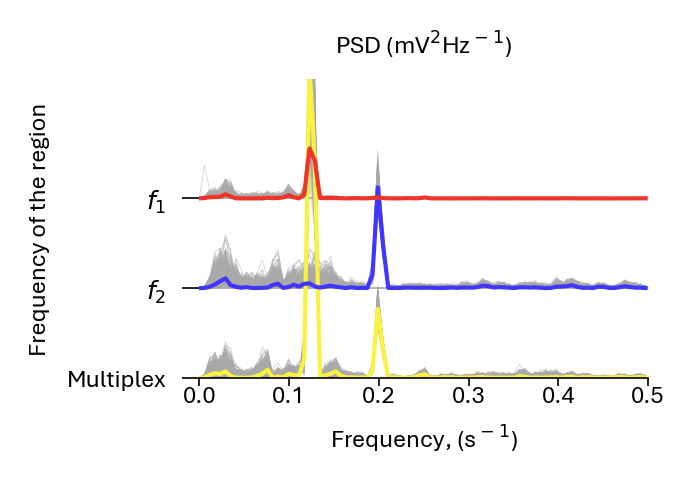

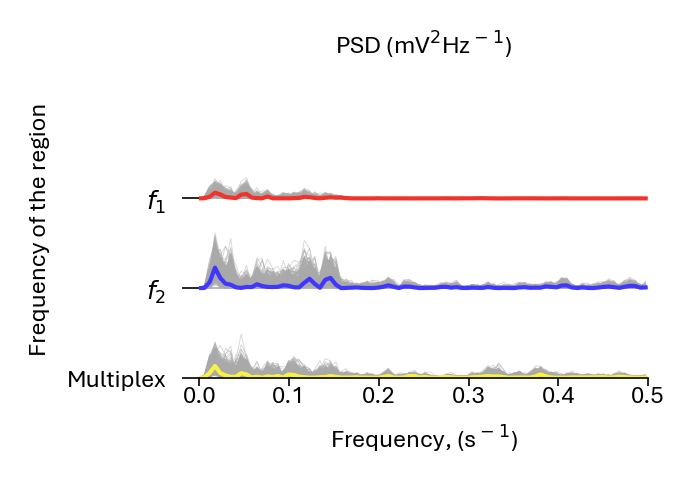

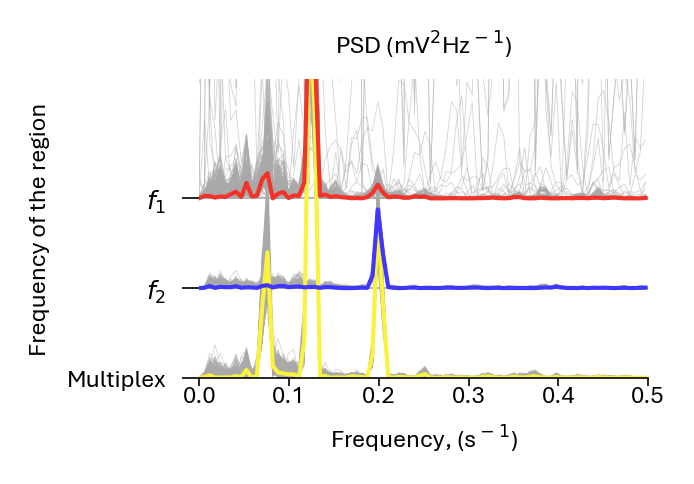

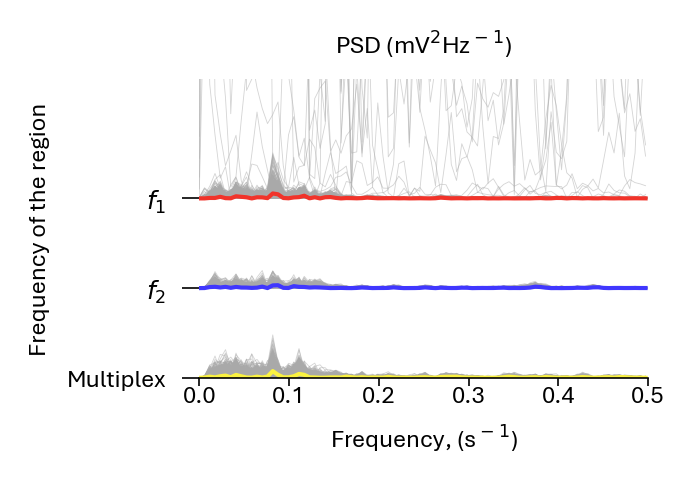

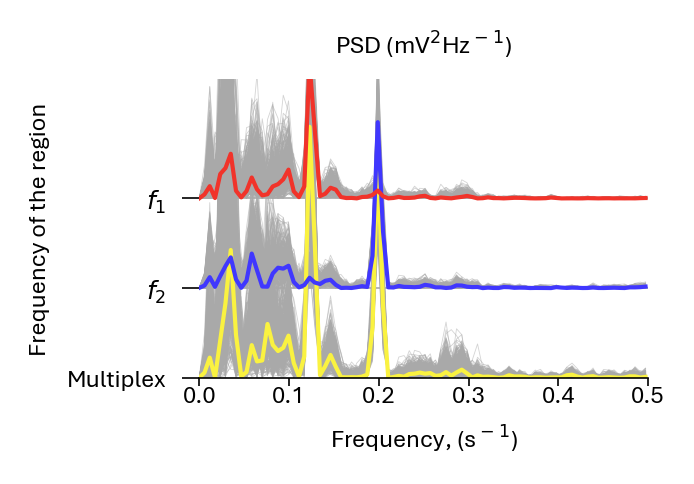

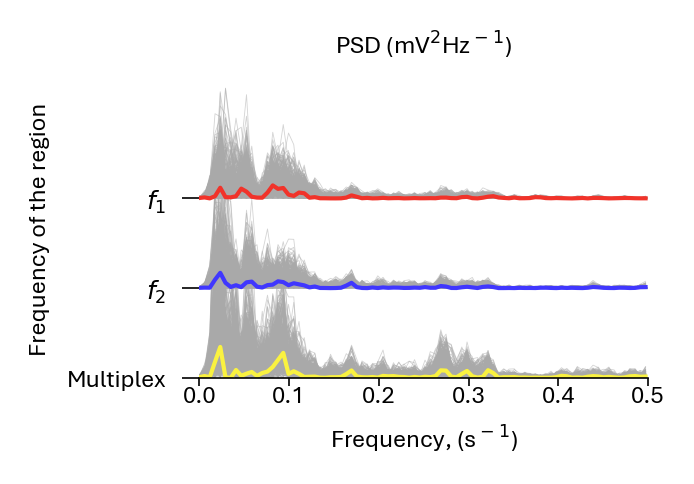

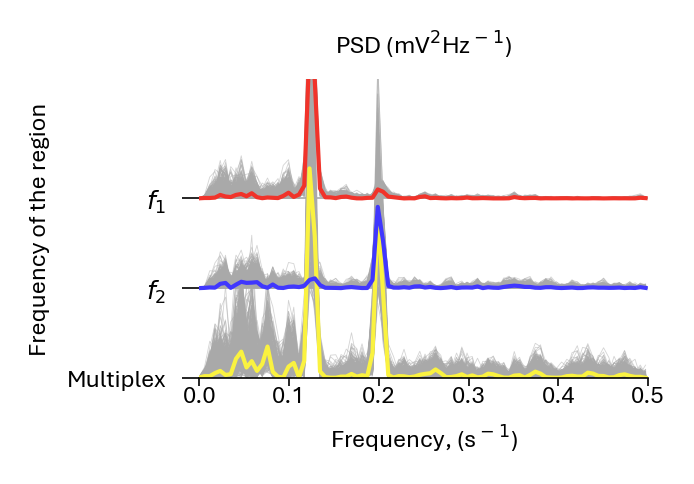

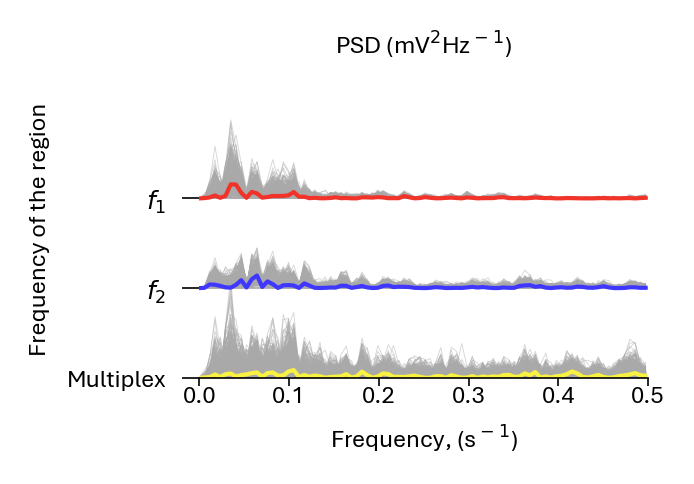

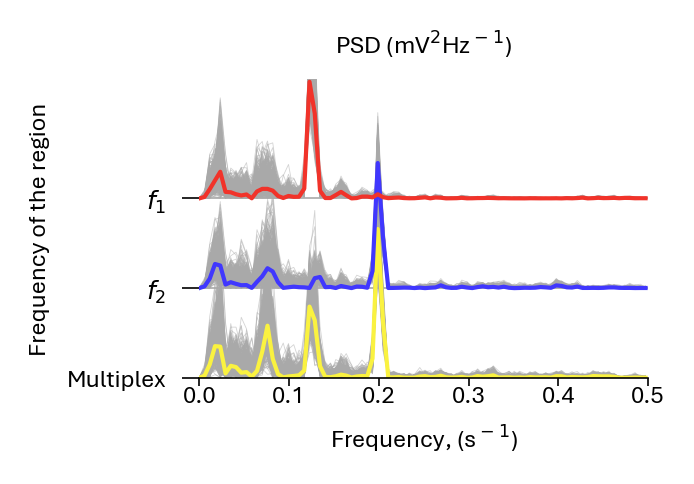

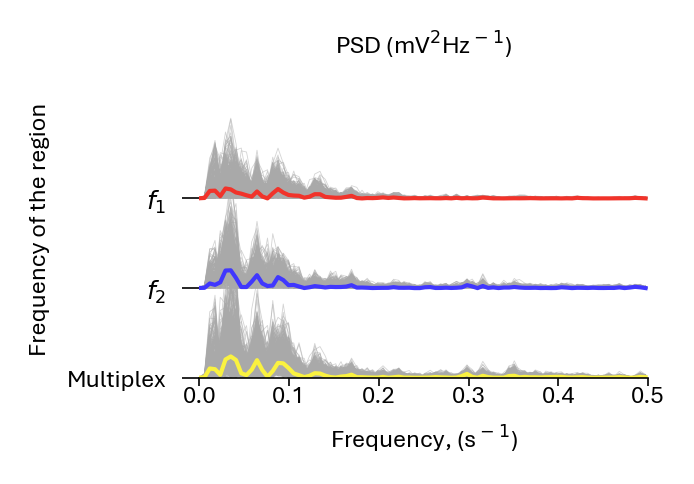

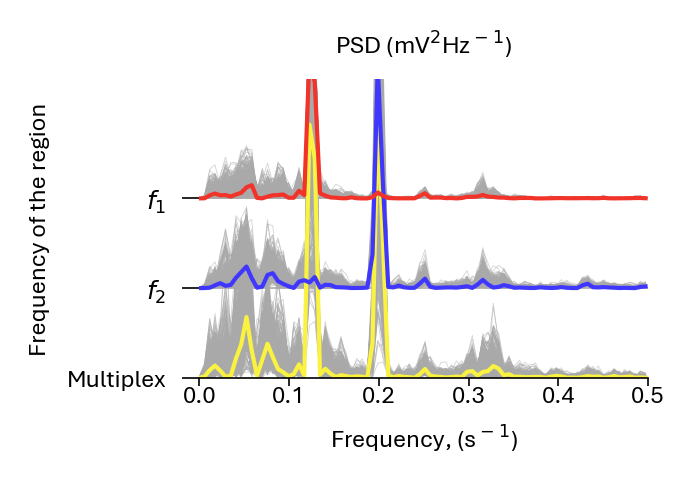

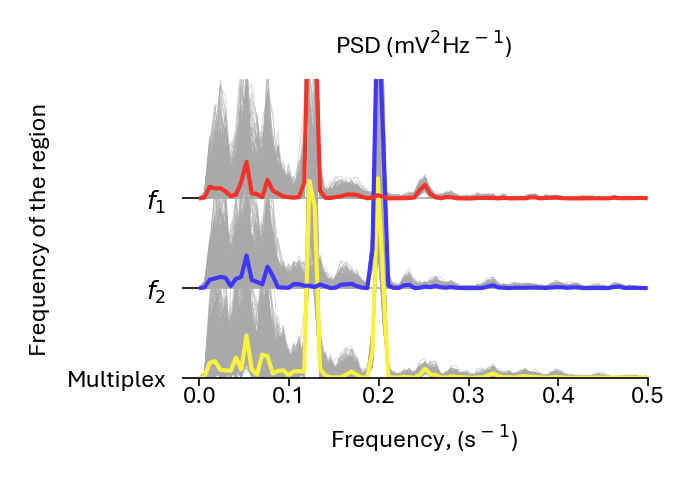

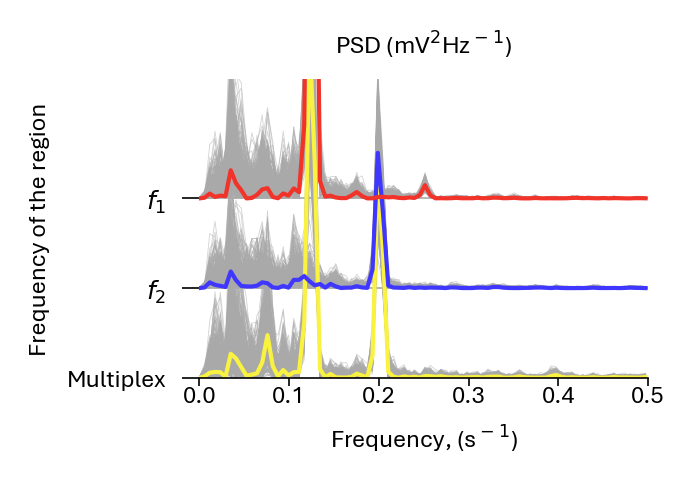

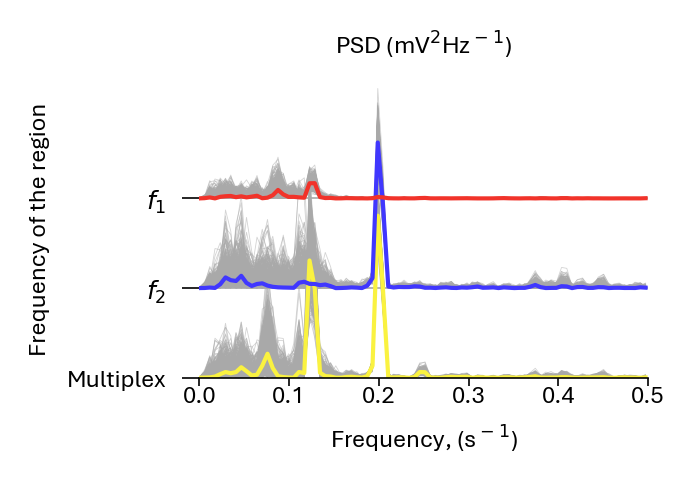

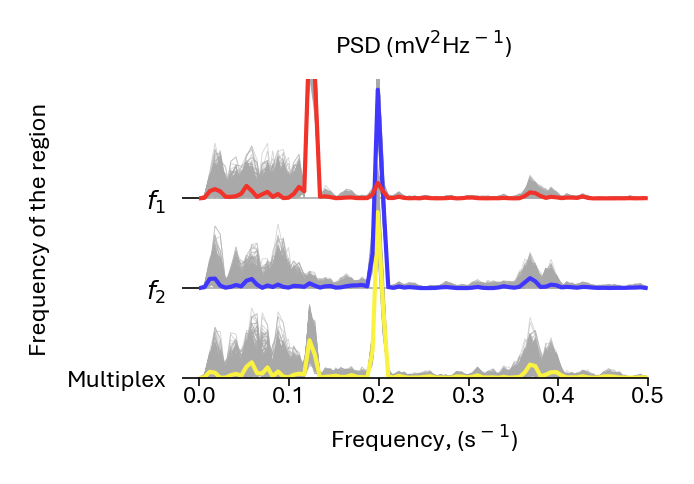

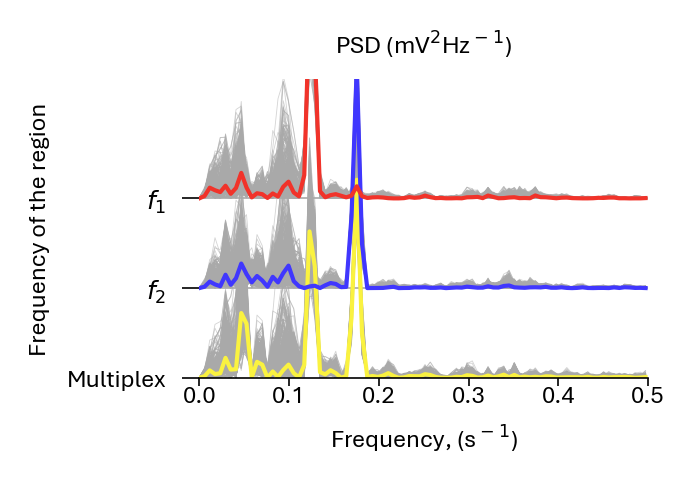

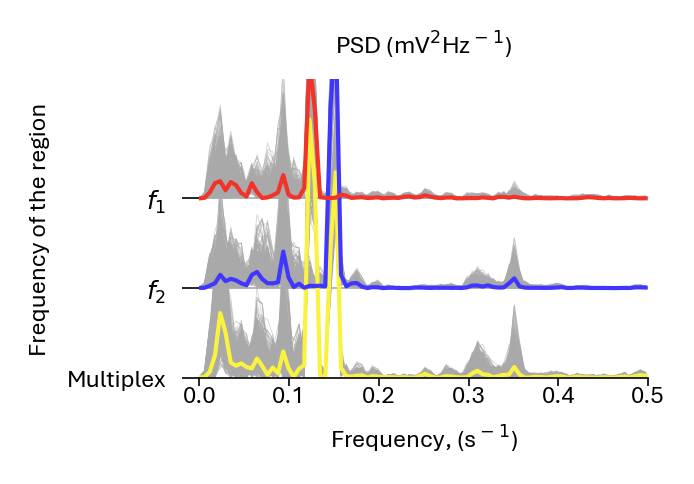

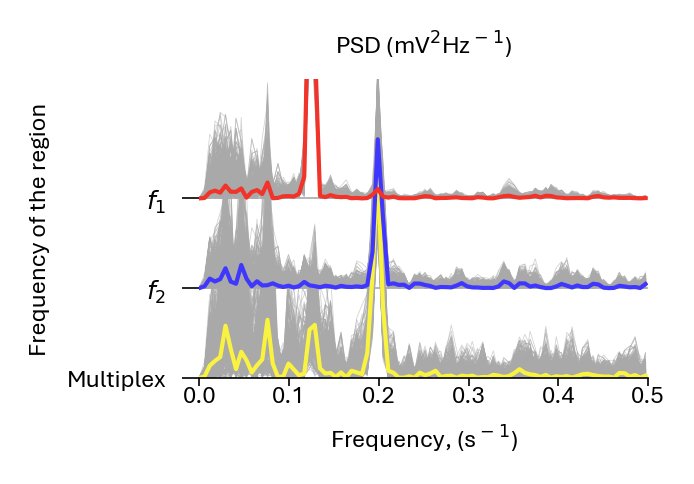

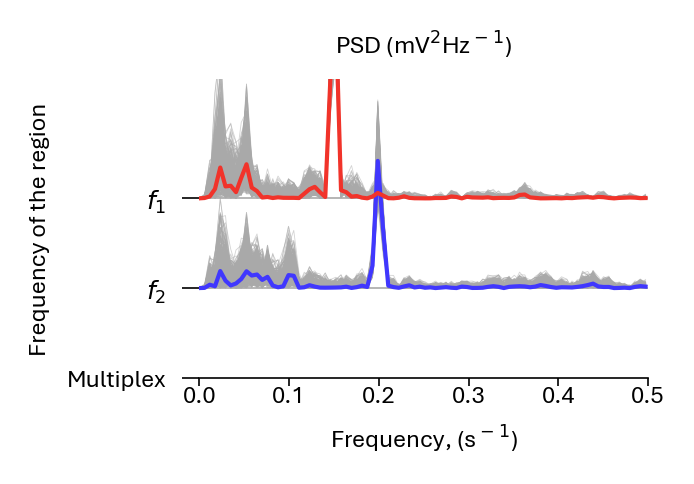

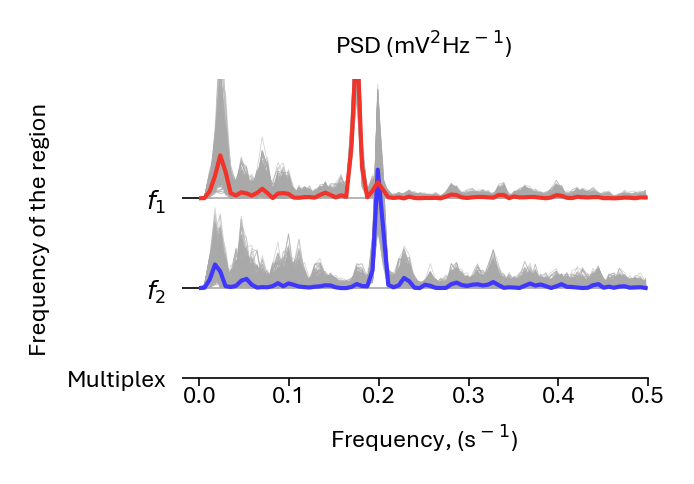

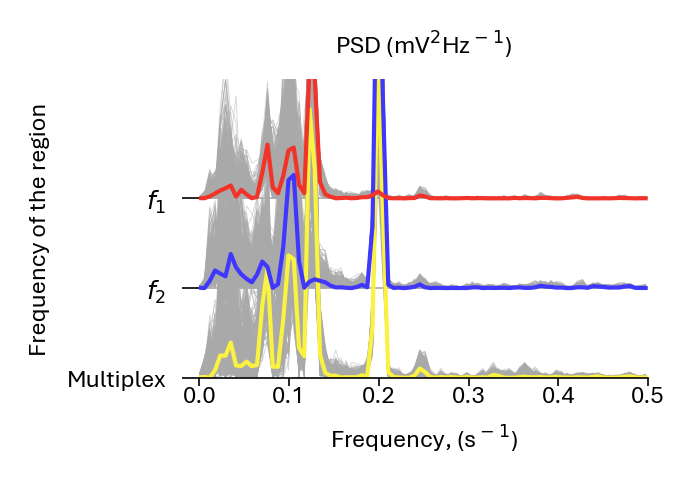

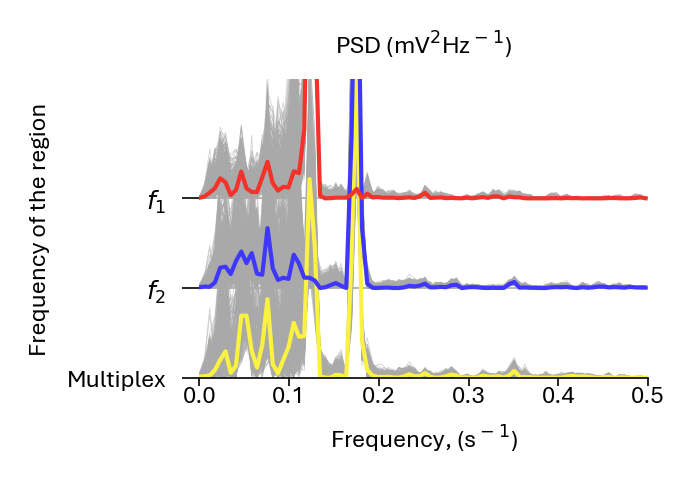

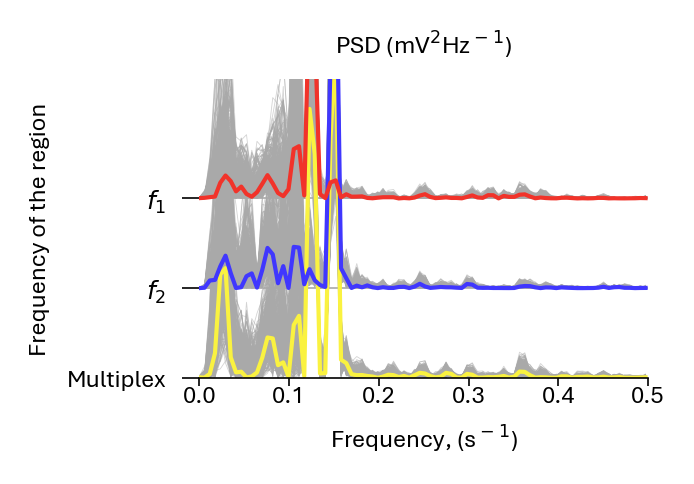

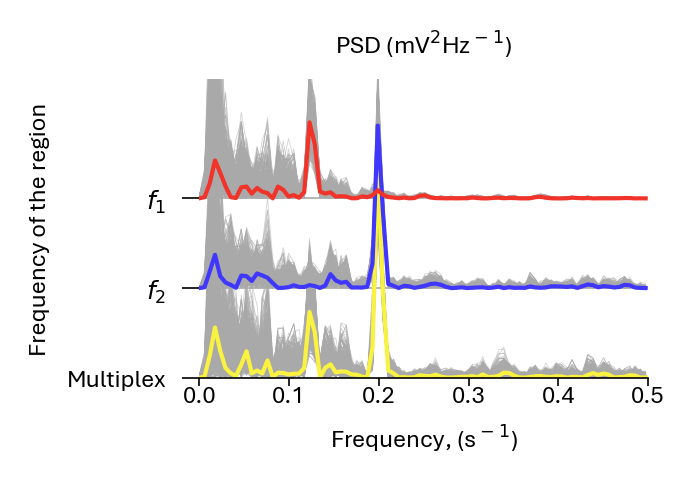

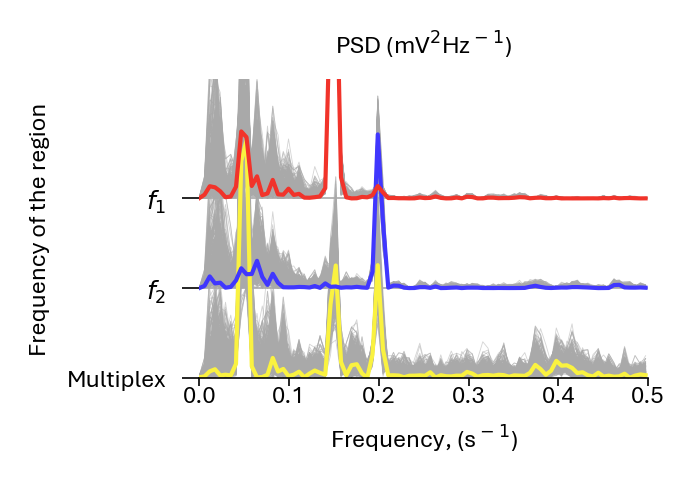

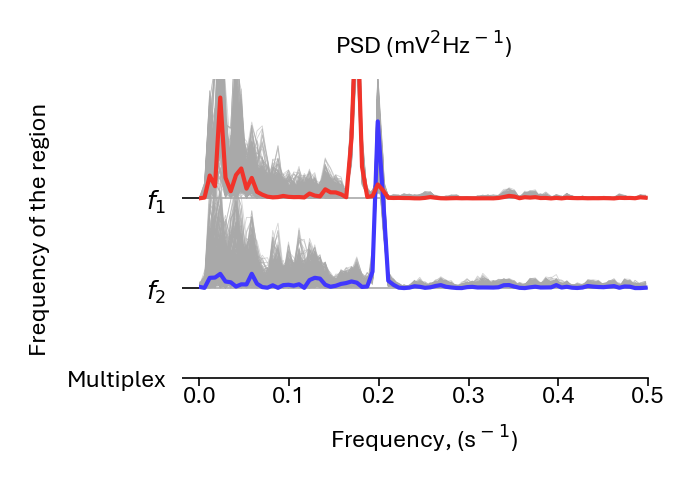

In [3]:
ylim = .00025
zoom_in = ""
roi_f_types = ["f1","f2","f1f2"]
datadir = Path("/scratch/fastfmri")
n_permutations = 5
n_bootstraps = 400
TR = .3
fo = .8

for pval in ["uncp", "fdrp"]:
    for _mri_ids, _sub_ids, _task_ids in zip(mri_ids, sub_ids, task_ids):
        for mri_id, sub_id, task_id in itertools.product(_mri_ids,_sub_ids,_task_ids):
            experiment_id, roi_task_id, test_frequencies = info_dict[(mri_id,task_id)]
            print(experiment_id, mri_id, sub_id, roi_task_id, task_id, test_frequencies)
            # Run
            im_test_frequencies_map = extract_im_products(test_frequencies[0], test_frequencies[1])
            im_test_frequencies = [v for v in im_test_frequencies_map.values()]
            nperseg=570
            rephase=False
            rephase_with=None
            frequency_grid=None
            pkl_handler = f1_f2_data(
                datadir, 
                n_bootstraps, 
                sub_id, 
                roi_task_id, # roi task id
                test_frequencies[0],test_frequencies[1], 
                task_id, # task id 
                experiment_id=experiment_id, 
                mri_id=mri_id, 
                fo=fo, 
                pval=pval,
            )

            frequency_grid = {}
            bootstrapped_power_spectrums = {}
            power_spectrum_from_mean_bootstrapped_timeseries = {}
            for f_type in roi_f_types: 
                frequency_grid[f_type], bootstrapped_power_spectrums[f_type], power_spectrum_from_mean_bootstrapped_timeseries[f_type] = analyze_rois(
                    pkl_handler, 
                    f_type, 
                    im_test_frequencies, 
                    n_bootstraps, 
                    TR, 
                    n_permutations=n_permutations, 
                    nperseg=nperseg, 
                    rephase=rephase,
                    rephase_with=None,
                    frequency_grid=None,
                    get_bootstrapped_psds=True,
                )

            im_test_frequencies_map = extract_im_products(test_frequencies[0], test_frequencies[1])

            FONTSIZE = 6
            roi_c_dict = get_roi_colour_codes()
            im_test_frequencies_map = extract_im_products(test_frequencies[0], test_frequencies[1])
            fig, ax_dict = plt.subplot_mosaic([["X"]], dpi=300, figsize=(2.2,1.5),layout="constrained")
            ax=ax_dict["X"]
            xmax = (frequency_grid["f1"] < .5).sum()
            constant= 7.5e-05
            if zoom_in == "higher":
                constant *= .075
            if zoom_in == "lower":
                constant *= .1
            for ix, f_type in enumerate(roi_f_types[::-1]):
                _frequency_grid = frequency_grid[f_type]
                print(power_spectrum_from_mean_bootstrapped_timeseries[f_type].max())
                mean_power_spectrum = power_spectrum_from_mean_bootstrapped_timeseries[f_type] + (constant*ix)
                ax.plot(_frequency_grid[:xmax],mean_power_spectrum[:xmax],c=roi_c_dict[f_type],lw=1,zorder=10)
                for bootstrap_ix in range(n_bootstraps):
                    _power_spectrum = bootstrapped_power_spectrums[f_type]
                    _power_spectrum = _power_spectrum[bootstrap_ix,:] + (constant*ix)
                    ax.plot(_frequency_grid[:xmax],_power_spectrum[:xmax],c='darkgrey',lw=.2,alpha=.5,zorder=5)

            for i in ("top", "right", "left"):
                ax.spines[i].set_visible(False)
            for i in ("top", "right", "bottom", "left"):
                ax.spines[i].set_linestyle('-')
                ax.spines[i].set_linewidth(.4)
            ax.spines.bottom.set_zorder(15)
            ax.set_ylim(0,ylim)
            ax.set_xlim(0,.5)
            ax.spines.bottom.set_bounds(0,.5)
            ax.set_xticks([0,.1,.2,.3,.4,.5])
            ax.set_xticklabels([f"{i:.1f}" for i in ax.get_xticks()], fontsize=FONTSIZE)
            ax.set_yticks([i*constant for i in range(3)])
            ax.set_yticklabels(["Multiplex", "$f_2$", f"$f_1$"], fontsize=FONTSIZE)
            ax.tick_params(axis="x", length=2.,width=.4,pad=0)
            ax.tick_params(axis="y", length=4.,width=.4,pad=4)
            for i in range(1,3):
                ax.plot([0,.5],[constant*i,constant*i],c='darkgray',lw=.4,zorder=7)
            """
            for k,v in im_test_frequencies_map.items():
                if k in ['f1','f2',"f2-f1","2f1-f2"]:
                    ax.plot([v,v],ax.get_ylim(),c='k',lw=.4,linestyle='dashed',zorder=15,alpha=.8)
            """

            ax.get_ylim()[-1]
            #ax.set_xlim(0,.5)
            ax.set_xbound(lower=0,upper=.5)
            ax.set_xlabel(f"Frequency, (s$^-$$^1$)",fontsize=FONTSIZE)
            ax.set_ylabel(f"Frequency of the region",fontsize=FONTSIZE)
            ax.set_title("PSD (mV$^2$Hz$^-$$^1$)",fontsize=FONTSIZE)

            bootstrapped_psd_dir = Path("ComputeCanada/frequency_tagging/figures/dual_frequency_roi_psd_bootstrapped")
            png_out = bootstrapped_psd_dir / f"mri-{mri_id}_sub-{sub_id}_roi-task-{roi_task_id}_pval-{pval}_task-{task_id}.png"
            if zoom_in == "higher":
                ax.set_xlim(.2,.45)
                ax.set_ylim(0,ylim*.075)
                ax.axvline(x=im_test_frequencies_map["f2-f1"], c='gold', linestyle=':', zorder=10, lw=.75)
                ax.axvline(x=im_test_frequencies_map["f1+f2"], c='gold', linestyle=':', zorder=10, lw=.75)
                ax.axvline(x=im_test_frequencies_map["2f1"], c='cyan', linestyle=':', zorder=10, lw=.75)
                ax.axvline(x=im_test_frequencies_map["2f2"], c='cyan', linestyle=':', zorder=10, lw=.75)
                ax.axvline(x=im_test_frequencies_map["2f1-f2"], c='green', linestyle=':', zorder=10, lw=.75)
                ax.axvline(x=im_test_frequencies_map["2f2-f1"], c='green', linestyle=':', zorder=10, lw=.75)
                png_out = bootstrapped_psd_dir / f"mri-{mri_id}_sub-{sub_id}_roi-task-{roi_task_id}_pval-{pval}_task-{task_id}_zoom-in-higher.png"
            if zoom_in == "lower":
                ax.set_xlim(0,.1)
                ax.set_ylim(0,ylim*.1)
                ax.axvline(x=im_test_frequencies_map["f2-f1"], c='gold', linestyle=':', zorder=10, lw=.75)
                ax.axvline(x=im_test_frequencies_map["f1+f2"], c='gold', linestyle=':', zorder=10, lw=.75)
                ax.axvline(x=im_test_frequencies_map["2f1"], c='cyan', linestyle=':', zorder=10, lw=.75)
                ax.axvline(x=im_test_frequencies_map["2f2"], c='cyan', linestyle=':', zorder=10, lw=.75)
                ax.axvline(x=im_test_frequencies_map["2f1-f2"], c='green', linestyle=':', zorder=10, lw=.75)
                ax.axvline(x=im_test_frequencies_map["2f2-f1"], c='green', linestyle=':', zorder=10, lw=.75)
                png_out = bootstrapped_psd_dir / f"mri-{mri_id}_sub-{sub_id}_roi-task-{roi_task_id}_pval-{pval}_task-{task_id}_zoom-in-lower.png"
            fig.savefig(png_out,dpi=600)
